In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

from sppanalysis_script import *

In [2]:
raw_data = pd.read_excel('all naming subjects.xlsx')
wordnet_sim = pd.read_csv('NT_trials_split_up_WordNet_pairs.csv')

In [6]:
isi50, isi1050 = data_processing(wordnet_sim, raw_data) 
col_50_0, col_50_1, col_1050_0, col_1050_1 = sim_split(isi50, isi1050, 'Wu-Palmer Similarity', 0.5,0.5) # threshold at 0.5 - since rating is linear, should be 50% 


In [7]:
"""
both tscore results are significant
"""

rt50_score, acc50_score = get_tscore(col_50_0, col_50_1)
rt1050_score, acc1050_score = get_tscore(col_1050_0, col_1050_1)

print(rt50_score)
print(acc50_score)
print(rt1050_score)
print(acc1050_score)

Ttest_indResult(statistic=7.357291398901576, pvalue=1.8843671072742717e-13)
Ttest_indResult(statistic=-6.076747306952601, pvalue=1.2287864487261286e-09)
Ttest_indResult(statistic=6.750462604599985, pvalue=1.4780072157406948e-11)
Ttest_indResult(statistic=-7.429031949758221, pvalue=1.098563546453545e-13)


In [8]:
get_descrip(col_50_0, col_50_1)

,RT_mean,RT_std,acc_mean,acc_std
less related,555.848528,190.212895,0.984758,0.122514
more related,549.453492,186.403051,0.988017,0.108811


In [9]:
get_descrip(col_1050_0, col_1050_1)

,RT_mean,RT_std,acc_mean,acc_std
less related,545.557447,204.618815,0.984980,0.121632
more related,539.241982,199.779348,0.988894,0.104798


In [10]:
grouped_50 = uni_wordpair(isi50, 'Wu-Palmer Similarity')
grouped_1050 = uni_wordpair(isi1050, 'Wu-Palmer Similarity')

In [11]:
grouped_50[grouped_50['Wu-Palmer Similarity'].isna()]

,target,prime,RT,RT_std,acc,acc_std,Wu-Palmer Similarity


In [12]:
list50 = get_sim(grouped_50, '50', 'Wu-Palmer Similarity')
list1050 = get_sim(grouped_1050, '1050', 'Wu-Palmer Similarity')

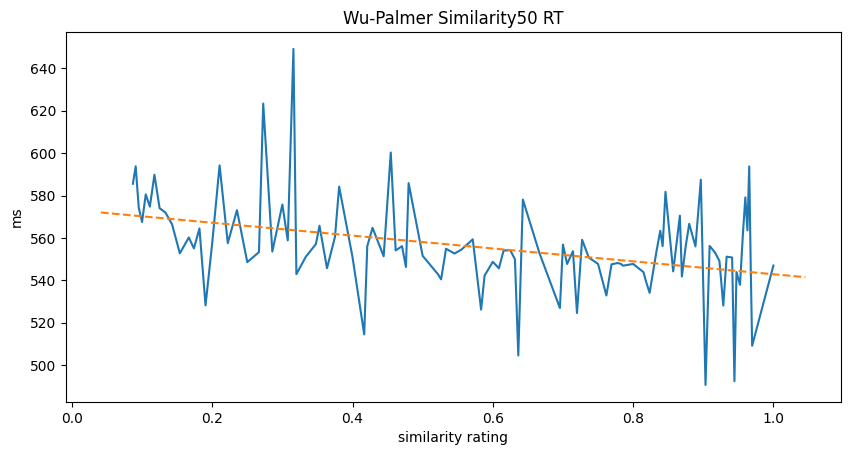

<Figure size 640x480 with 0 Axes>

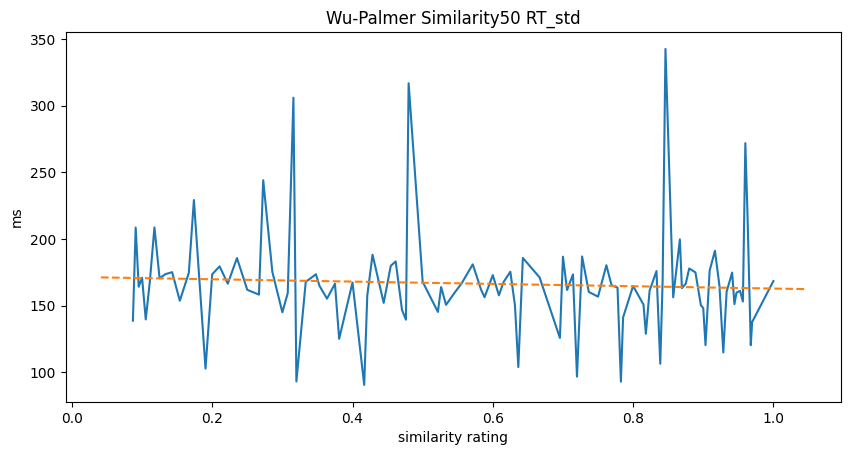

<Figure size 640x480 with 0 Axes>

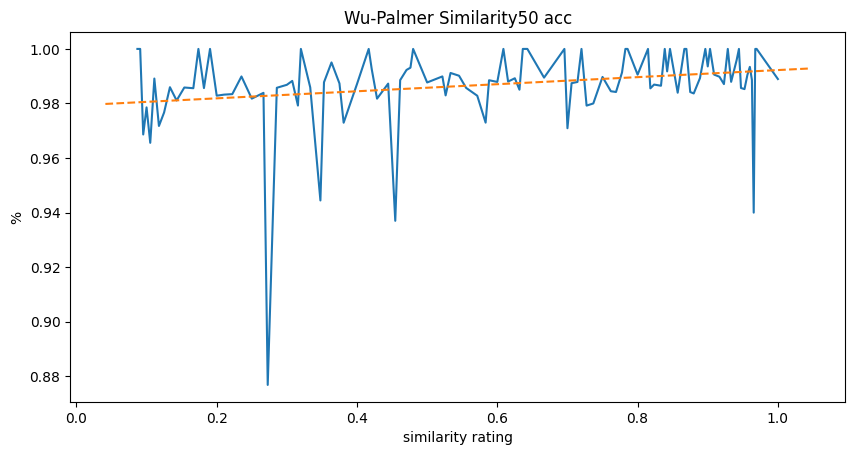

<Figure size 640x480 with 0 Axes>

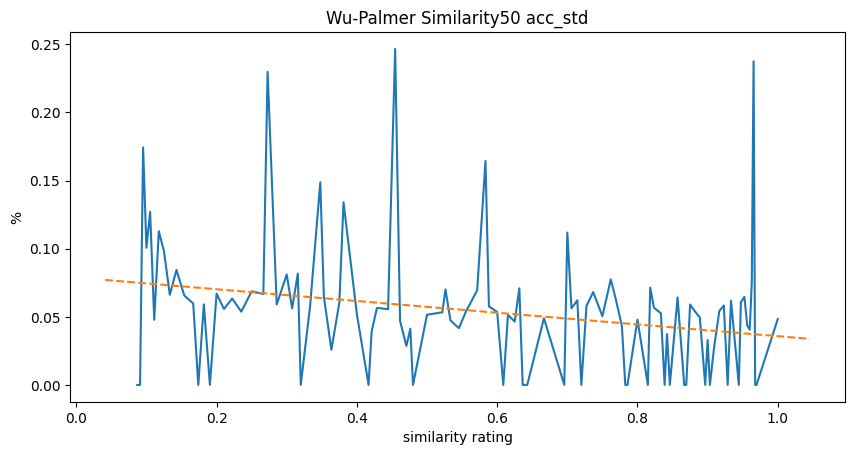

<Figure size 640x480 with 0 Axes>

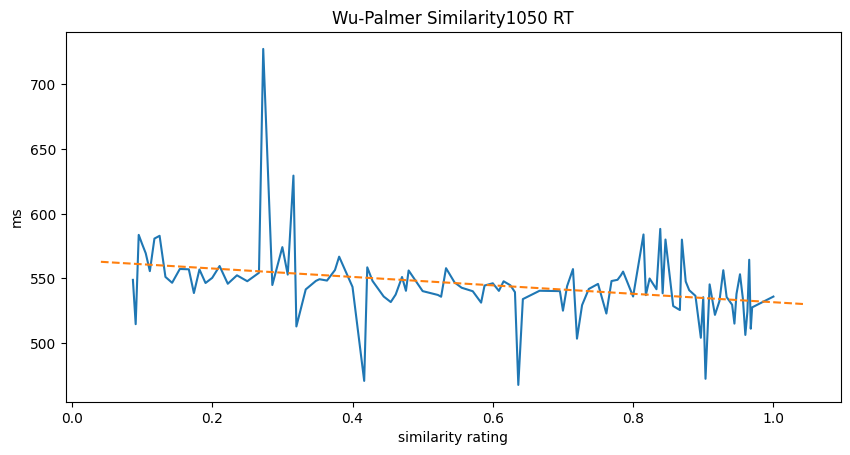

<Figure size 640x480 with 0 Axes>

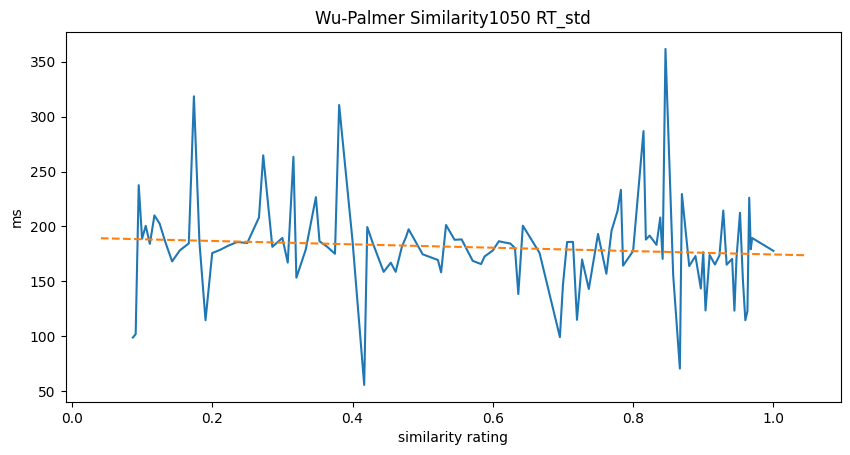

<Figure size 640x480 with 0 Axes>

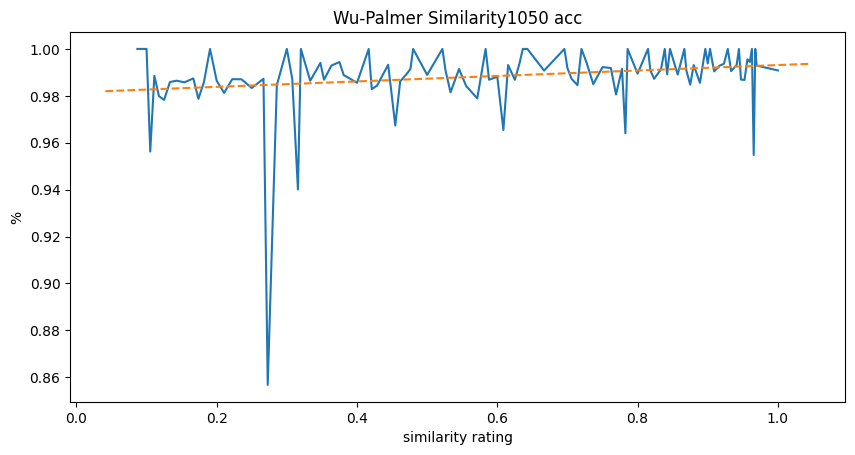

<Figure size 640x480 with 0 Axes>

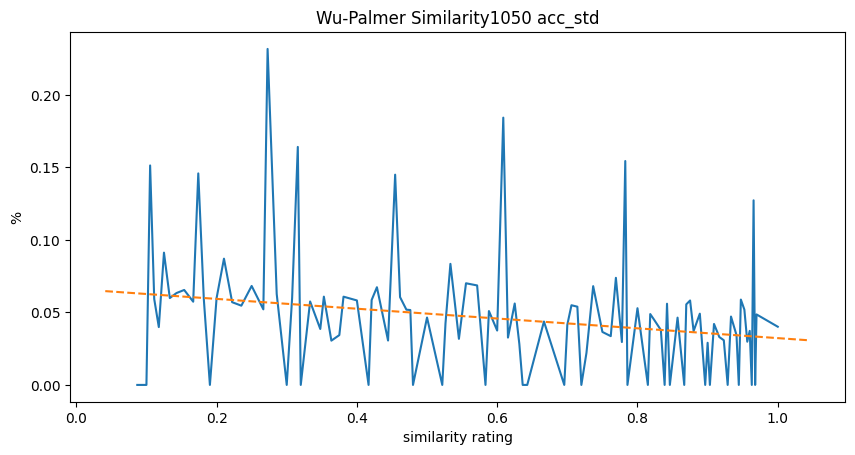

<Figure size 640x480 with 0 Axes>

In [13]:
make_plots(list50, list1050)